In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# **Data Loading**

In [2]:
# Read Fraud_Database_Final Data
file_path = "Fraud_Database_Final.csv"
df_main = pd.read_csv(file_path)

# Display main data
df_main.head()

,first,last,merchant,category,amt,gender,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,c51c8bbd9e8c8bc49042ccd5d3e9864d,af71378b7245985acfe79adb3bc39a1a,fraud_Kilback and Sons,entertainment,3.15,M,42.9993,-88.2196,95015,"Therapist, occupational",1/2/1946,43.042165,-87.428874,0
1,e1f6a14cd07069692017b53a8ae881f6,e90dfb84e30edf611e326eeb04d680de,fraud_Kuvalis Ltd,gas_transport,73.80,F,39.1505,-79.5030,836,Forensic psychologist,8/29/1981,39.269038,-79.768206,0
2,4ffe35db90d94c6041fb8ddf7b44df29,d52e32f3a96a64786814ae9b5279fbe5,fraud_Herzog Ltd,misc_pos,103.95,M,38.1380,-89.2231,2135,"Development worker, community",1/31/1961,37.588774,-89.212809,0
3,3e06fa3927cbdf4e9d93ba4541acce86,7930c951e609e461e8226004ed91a985,fraud_Kuphal-Toy,food_dining,37.93,M,36.4539,-94.1180,6434,Product designer,8/28/1967,36.861606,-94.524270,0
4,2c189daaf59521812364f9c340402b92,febe862bfdffb6fb3a5d38ffb0e09b54,fraud_Bauch-Raynor,grocery_pos,119.95,F,41.4972,-98.7858,509,"Nurse, children's",9/15/1980,42.007948,-98.462757,0


In [3]:
#check any null whether clean or not clean
df_main.isnull().any()

first         False
last          False
merchant      False
category      False
amt           False
gender        False
lat           False
long          False
city_pop      False
job           False
dob           False
merch_lat     False
merch_long    False
is_fraud      False
dtype: bool

In [35]:
#Check info
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   first       555719 non-null  object 
 1   last        555719 non-null  object 
 2   merchant    555719 non-null  object 
 3   category    555719 non-null  object 
 4   amt         555719 non-null  float64
 5   gender      555719 non-null  object 
 6   lat         555719 non-null  float64
 7   long        555719 non-null  float64
 8   city_pop    555719 non-null  int64  
 9   job         555719 non-null  object 
 10  dob         555719 non-null  object 
 11  merch_lat   555719 non-null  float64
 12  merch_long  555719 non-null  float64
 13  is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 59.4+ MB


In [5]:
# To check the column names
df_main.columns

Index(['first', 'last', 'merchant', 'category', 'amt', 'gender', 'lat', 'long',
       'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
# To remove not required columns
df_required = df_main.drop(columns = {"first", "last", "merchant", "category", "gender", "job", "dob"} )

# Display df_required dataset
df_required.head()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,3.15,42.9993,-88.2196,95015,43.042165,-87.428874,0
1,73.80,39.1505,-79.5030,836,39.269038,-79.768206,0
2,103.95,38.1380,-89.2231,2135,37.588774,-89.212809,0
3,37.93,36.4539,-94.1180,6434,36.861606,-94.524270,0
4,119.95,41.4972,-98.7858,509,42.007948,-98.462757,0


## **Data Visualization**

In [7]:
#check mean to see normalisation needed
df_required.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,69.392810,38.543253,-90.231325,8.822189e+04,38.542798,-90.231380,0.003860
std,156.745941,5.061336,13.721780,3.003909e+05,5.095829,13.733071,0.062008
min,1.000000,20.027100,-165.672300,2.300000e+01,19.027422,-166.671575,0.000000
25%,9.630000,34.668900,-96.798000,7.410000e+02,34.755302,-96.905129,0.000000
50%,47.290000,39.371600,-87.476900,2.408000e+03,39.376593,-87.445204,0.000000
75%,83.010000,41.894800,-80.175200,1.968500e+04,41.954163,-80.264637,0.000000
max,22768.110000,65.689900,-67.950300,2.906700e+06,66.679297,-66.952026,1.000000


Text(0, 0.5, 'amt')

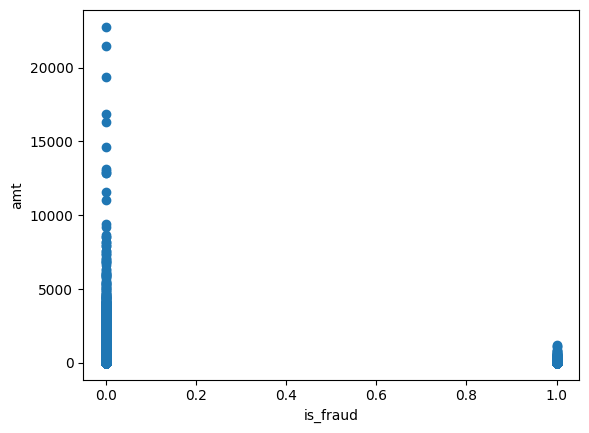

In [9]:
# Scatter plot of is_fraud column.

plt.scatter(df_required.is_fraud,df_required.amt)
plt.xlabel('is_fraud')# X-axis is_fraud
plt.ylabel('amt')

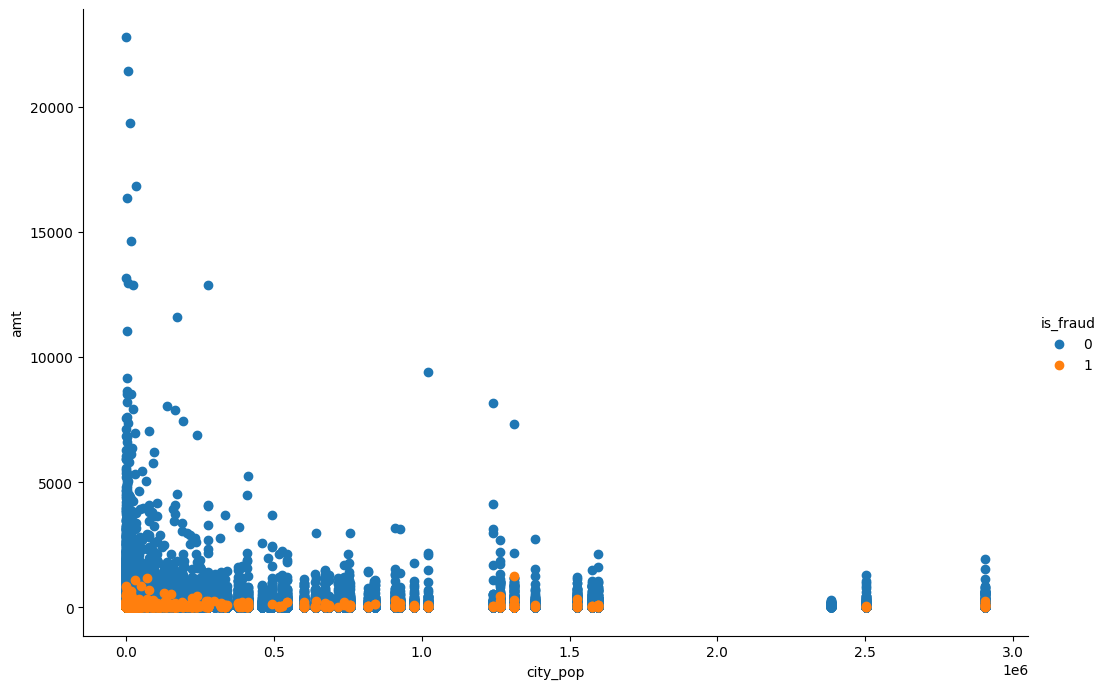

In [106]:
import seaborn as sns# Import library
def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=7, aspect=1.5).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

pairplot_data_grid(df_required, "city_pop", "amt", "is_fraud")

**What is relationship of fraud transactions with amount of money?**

We hypothesise based on our scatter plots that all fraud transactions occur for an amount less than 2500.

### **MACHINE LEARNING**

## **Split the data into X and y and then into testing and training sets.**

In [10]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = df_required['is_fraud']

# The X variable should include all features except the target
X = df_required.drop(columns=['is_fraud'])



In [11]:
X.head()

,amt,lat,long,city_pop,merch_lat,merch_long
0,3.15,42.9993,-88.2196,95015,43.042165,-87.428874
1,73.80,39.1505,-79.5030,836,39.269038,-79.768206
2,103.95,38.1380,-89.2231,2135,37.588774,-89.212809
3,37.93,36.4539,-94.1180,6434,36.861606,-94.524270
4,119.95,41.4972,-98.7858,509,42.007948,-98.462757


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [13]:
y.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [14]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train.shape

(416789, 6)

In [15]:
y_train.value_counts()

0    415180
1      1609
Name: is_fraud, dtype: int64

In [16]:
y_test.value_counts()

0    138394
1       536
Name: is_fraud, dtype: int64

**Since y_train value is highly imbalanced and discrete, we used SMOTE (if continuous Y , then no need)**

In [44]:
# Import library
from imblearn.over_sampling import SMOTE


In [41]:
# Oversampling the miniority to majority
X_train,y_train = SMOTE(random_state=511).fit_resample(X_train,y_train)

In [42]:
y_train.value_counts() #Can only change train set -> Test set cannot.

0    415180
1    415180
Name: is_fraud, dtype: int64

**Normalization do after splitting need to do twice , one for train and one for test**

In [45]:
from scipy import stats     #Import library

In [46]:
#Using zscore method is a bigger range e.g -3 to 3  (More popular)
#Using mean/max -> range will from 0 to 1
X_train["amt"] = stats.zscore(X_train["amt"])  #Only normalisation amt for X train -> Need do both train/test
X_test["amt"] = stats.zscore(X_test["amt"])    #Only normalisation amt for X test  -> Need do both train/test

**Model 1: Logistics Regression**

In [48]:
# Model 1: Logistic Regression
from sklearn import linear_model #Import library

In [49]:
model= linear_model.LogisticRegression(max_iter=500,random_state=1911)
#without stating 500 iteration by default should b 100

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
model.fit(X_train,y_train)   #Learning

LogisticRegression(max_iter=500, random_state=1911)

In [67]:
pred = model.predict(X_test) #Predict the test

In [53]:
#Generate training predictions
training_predictions = model.predict(X_train)

In [66]:
#Generate training predictions
testing_predictions = model.predict(X_test)

In [68]:
# Create confusion matrix for test
cm= confusion_matrix(y_test,pred)
cm

array([[     0, 138394],
       [     0,    536]])

In [69]:
ATest1=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Model 1 test accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))
# NEED CHECK WHETHER Coverge by changing iteration number  e.g 100(0.788)-> 500(0.7908)->3000((0.7908))
#If yes then stop

Model 1 test accuracy is  0.003858058014827611


In [70]:
# Train Set -> To test overfiting  (Accuracy Train set vs test set)
pred = model.predict(X_train) #Predict the train
cm = confusion_matrix(y_train,pred)       #Train
cm


array([[     0, 415180],
       [     0, 415180]])

In [71]:
ATrain1=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Model 1 train accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Model 1 train accuracy is  0.5


In [72]:
# Create and save the training classification report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    415180
           1       0.50      1.00      0.67    415180

    accuracy                           0.50    830360
   macro avg       0.25      0.50      0.33    830360
weighted avg       0.25      0.50      0.33    830360



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    138394
           1       0.00      1.00      0.01       536

    accuracy                           0.00    138930
   macro avg       0.00      0.50      0.00    138930
weighted avg       0.00      0.00      0.00    138930



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Model 2: Decision Tree**

In [75]:
# Import library
from sklearn import tree

In [76]:
pred = model.predict(X_test) #Predict the test

In [77]:
model = tree.DecisionTreeClassifier(random_state=1911)   #Max depth

In [83]:
model.fit(X_train,y_train)  #Learning
pred = model.predict(X_test) #Predict the test
cm = confusion_matrix(y_test,pred) # Confusion matrix
ATest2=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Model 2 test set accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

Model 2 test set accuracy is  0.9723961707334629


In [81]:
cm # Print confusion matrix for test set

array([[135084,   3310],
       [   525,     11]])

In [86]:
# Train Set -> To test overfiting  (Accuracy Train set vs test set)
pred = model.predict(X_train) #Predict the train
cm = confusion_matrix(y_train,pred)       #Train
ATrain2=(cm[0,0]+cm[1,1])/(sum(sum(cm))) # Confusion matrix
print("Model 2 train set accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

Model 2 train set accuracy is  1.0


In [87]:
cm # Print confusion matrix for train set

array([[415180,      0],
       [     0, 415180]])

**Model 3: Random Forest**

In [108]:
# Import library
from sklearn import ensemble

In [109]:
model = ensemble.RandomForestClassifier(random_state=1911) # Learning

In [110]:
model.fit(X_train,y_train) # Train the model
pred = model.predict(X_test)# Predict the test
cm = confusion_matrix(y_test,pred)# Confusion matrix
print(cm)
ATest3=(cm[0,0]+cm[1,1])/(sum(sum(cm))) # Calculate accuracy
print("Model 3 test accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[135889   2505]
 [   525     11]]
Model 3 test accuracy is  0.978190455625135


In [111]:
# Train Set -> To test overfiting  (Accuracy Train set vs test set)
model.fit(X_train,y_train)
pred = model.predict(X_train) #Predict the train
cm = confusion_matrix(y_train,pred)       #Train
print(cm)
ATrain3=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Model 3 train set accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[415180      0]
 [     1 415179]]
Model 3 train set accuracy is  0.9999987957030686


**Model 4: Gradient Boosting**

In [97]:
model = ensemble.GradientBoostingClassifier(random_state=1911)# Learning

In [98]:
model.fit(X_train,y_train)# Train the model
pred = model.predict(X_test)# Predict the test
cm = confusion_matrix(y_test,pred)# Confusion matrix
print(cm)
ATest4=(cm[0,0]+cm[1,1])/(sum(sum(cm)))# Calculate accuracy
print("Model 4 test set accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[57664 80730]
 [  220   316]]
Model 4 test set accuracy is  0.41733246958900166


In [99]:
# Train Set -> To test overfiting  (Accuracy Train set vs test set)
pred = model.predict(X_train) #Predict the train
cm = confusion_matrix(y_train,pred)       #Confusion matrix
print(cm)
ATrain4=(cm[0,0]+cm[1,1])/(sum(sum(cm)))# Calculate accuracy
print("Model 4 train accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[226001 189179]
 [104813 310367]]
Model 4 train accuracy is  0.6459463365287346


**Model 5: Neural Network**

In [100]:
# Import library
from sklearn import neural_network

In [101]:
model = neural_network.MLPClassifier(random_state=1911)# Learning

In [102]:
#Test set.
model.fit(X_train,y_train)# Train the model
pred = model.predict(X_test)# Predict the test
cm = confusion_matrix(y_test,pred)# Confusion matrix
print(cm)
ATest5= (cm[0,0]+cm[1,1])/(sum(sum(cm)))# Calculate accuracy
print("Model 5 test set accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 27224 111170]
 [    99    437]]
Model 5 test set accuracy is  0.19910026632116892


In [103]:
#check if overfitting

pred = model.predict(X_train)
cm = confusion_matrix(y_train,pred)
print(cm)
ATrain5= (cm[0,0]+cm[1,1])/(sum(sum(cm)))
print("Model 5 train set accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 83157 332023]
 [ 61767 353413]]
Model 5 train set accuracy is  0.5257599113637459


# **Comparision Table**

In [112]:
# Comparision table
import pandas as pd
Accuracy_Visual =[['LogisticRegression',ATest1,ATrain1],
                  ['DecisionTree',ATest2,ATrain2],
                  ['RandomForest',ATest3,ATrain3],
                  ['GradientBoosting',ATest4,ATrain4],
                  ['Neural Network',ATest5,ATrain5]]
Accuracy_Visual= pd.DataFrame(Accuracy_Visual, columns=['Model', 'Test Accuracy',
                                     'Train Accuracy'])
Accuracy_Visual.sort_values(by=['Test Accuracy'], ascending=False)

,Model,Test Accuracy,Train Accuracy
2,RandomForest,0.978190,0.999999
1,DecisionTree,0.972396,1.000000
3,GradientBoosting,0.417332,0.645946
4,Neural Network,0.199100,0.525760
0,LogisticRegression,0.003858,0.500000


### **SUMMARY and CONCULSION**


*   All Fraud Transactions occur for an amount below 2500. Thus, the bank can infer clearly that the fraud committers try to commit frauds of smaller amounts to avoid suspicion.
*   The fraud transactions are equitable distributed throughout range of city popoluation and there is no clear relationship of city popoluation with commiting of fraud.
*   The number of fraud transactions are very few comparted to legitimate transactions and it has to be balanced in order for a fair comparison to prevent the model from overfitting.
*   SMOTE overcomes overfitting by synthetically oversampling minority class labels.
*   Among 5 different models used, Random Forest Model and Decision Tree model gave the maximum accuracy for Test set and Train set. Random Forest Algorithm is robust against overfitting, robust to outliers and non-linear data and runs efficiently on large database. Hence, we would choose Random Forest method over Decision Tree model for our dataset to predict fraudulant transaction.  

